In [1]:
import xpress as xp
#xp.controls.outputlog = 0 # turn off output log

import numpy as np
import pylab as pl

In [2]:
size = 8
size_squared = size**2

queens = xp.problem()

In [3]:
x = np.array([xp.var(vartype=xp.binary) for _ in range(size_squared)]).reshape(size, size)
queens.addVariable(x)

In [4]:
queens.addConstraint(xp.Sum(x[i]) <= 1 for i in range(size))
queens.addConstraint(xp.Sum(x[:, j]) <= 1 for j in range(size))

for i in range(-size, size):
    diagonal = np.diag(np.ones(size-np.abs(i)), k=i)
    rotated_diagonal = np.rot90(diagonal)
    queens.addConstraint(xp.Sum(x * diagonal) <= 1)
    queens.addConstraint(xp.Sum(x * rotated_diagonal) <= 1)

In [5]:
queens.setObjective(xp.Sum(x), sense=xp.maximize)

In [6]:
queens.solve()

FICO Xpress v8.13.5, Community, solve started 1:16:48, May 1, 2022
Heap usage: 361KB (peak 361KB, 304KB system)
Maximizing MILP noname using up to 4 threads, with these control settings:
OUTPUTLOG = 1
Original problem has:
        48 rows           64 cols          256 elements        64 globals
Presolved problem has:
        42 rows           64 cols          272 elements        64 globals
Presolve finished in 0 seconds
Heap usage: 406KB (peak 431KB, 304KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
Autoscaling applied standard scaling

Symmetric problem: generators: 2, support set: 64
 Number of orbits: 10, largest orbit: 8
 Row orbits: 11, row support: 42
Will try to keep branch and bound tree memory usage below 9.

In [7]:
queens.getObjVal()

8.0

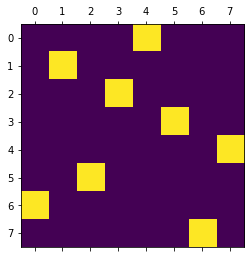

In [8]:
sol = np.array(queens.getSolution()).reshape(size, size)

pl.matshow(sol)